## EDA: TOP 50 SPOTIFY 

[Limpieza y adecuación de valores](#limpieza)

[Nuevo DataFrame](#Nuevo)

[Géneros más bailables](#bailabilidad)

[Artistas más bailables](#Artistas_bailabilidad)

[Correlación de variables](#correlacion)

[Estudio de la duración de las canciones](#duracion)

[¿Canciones positivas o negativas?](#mensaje)

[Los géneros más escuchados](#Top_generos)

[Diversificación de los artistas](#diversificacion)

[Artistas más escuchados](#nube)

In [1]:

import pandas as pd
from Utils import Funciones as ft
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:
warnings.filterwarnings("ignore")
%matplotlib inline

Mostramos los DataSets originales

In [3]:
df_2019 = pd.read_csv('Data/top2019.csv', encoding= 'latin1')
df_2019.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [4]:
df_2020 = pd.read_csv('Data/top2020.csv')
df_2020.head()

,Unnamed: 0,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


Limpieza y homogeinización de valores del top 2019 <a id= 'limpieza' ></a>

In [6]:
df_2019_limpio = df_2019.drop(['Popularity', 'Liveness', 'Acousticness..'], axis=1)
df_2019_limpio.rename(columns={'Unnamed: 0' : 'posicion', 'Track.Name' : 'name', 'Artist.Name' : 'artist', 'Genre' : 'genre', 'Beats.Per.Minute': 'tempo', 'Energy' : 'energy', 'Danceability' : 'danceability', 'Loudness..dB..' : 'loudness', 'Valence.' : 'valence', 'Length.' : 'length', 'Speechiness.' : 'speechiness'}, inplace=True)


In [7]:

df_2019_limpio[['energy', 'danceability', 'valence', 'speechiness']] = df_2019_limpio[['energy', 'danceability', 'valence', 'speechiness']]/100
df_2019_limpio['date']= 2019
df_2019_limpio.head()



,posicion,name,artist,genre,tempo,energy,danceability,loudness,valence,length,speechiness,date
0,1,Señorita,Shawn Mendes,canadian pop,117,0.55,0.76,-6,0.75,191,0.03,2019
1,2,China,Anuel AA,reggaeton flow,105,0.81,0.79,-4,0.61,302,0.09,2019
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,0.80,0.40,-4,0.70,186,0.46,2019
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,0.65,0.64,-8,0.55,198,0.19,2019
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,0.65,0.58,-4,0.18,175,0.07,2019


In [8]:
df_2019_limpio[['tempo', 'energy', 'danceability', 'loudness', 'valence', 'length', 'speechiness']] = df_2019_limpio[['tempo', 'energy', 'danceability', 'loudness', 'valence', 'length', 'speechiness']].astype('float')


In [9]:
df_2019_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   posicion      50 non-null     int64  
 1   name          50 non-null     object 
 2   artist        50 non-null     object 
 3   genre         50 non-null     object 
 4   tempo         50 non-null     float64
 5   energy        50 non-null     float64
 6   danceability  50 non-null     float64
 7   loudness      50 non-null     float64
 8   valence       50 non-null     float64
 9   length        50 non-null     float64
 10  speechiness   50 non-null     float64
 11  date          50 non-null     int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 4.8+ KB


In [10]:
df_2019_limpio.head()

,posicion,name,artist,genre,tempo,energy,danceability,loudness,valence,length,speechiness,date
0,1,Señorita,Shawn Mendes,canadian pop,117.0,0.55,0.76,-6.0,0.75,191.0,0.03,2019
1,2,China,Anuel AA,reggaeton flow,105.0,0.81,0.79,-4.0,0.61,302.0,0.09,2019
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190.0,0.80,0.40,-4.0,0.70,186.0,0.46,2019
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93.0,0.65,0.64,-8.0,0.55,198.0,0.19,2019
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150.0,0.65,0.58,-4.0,0.18,175.0,0.07,2019


In [274]:
#df_2019_limpio.info()

Limpieza y homogeinización de valores del top 2020

In [11]:
df_2020_limpio = df_2020.drop(['album', 'track_id', 'key', 'instrumentalness', 'acousticness', 'liveness'], axis=1)
df_2020_limpio.rename(columns={'Unnamed: 0' : 'posicion', 'track_name' : 'name', 'duration_ms' : 'length'}, inplace=True)

In [12]:
df_2020_limpio['length'] = df_2020_limpio['length']/1000
df_2020_limpio[['tempo', 'loudness']] = df_2020_limpio[['tempo', 'loudness']].round(0)
df_2020_limpio['date']= 2020
df_2020_limpio.head()


,posicion,artist,name,energy,danceability,loudness,speechiness,valence,tempo,length,genre,date
0,0,The Weeknd,Blinding Lights,0.730,0.514,-6.0,0.0598,0.334,171.0,200.040,R&B/Soul,2020
1,1,Tones And I,Dance Monkey,0.593,0.825,-6.0,0.0988,0.540,98.0,209.755,Alternative/Indie,2020
2,2,Roddy Ricch,The Box,0.586,0.896,-7.0,0.0559,0.642,117.0,196.653,Hip-Hop/Rap,2020
3,3,SAINt JHN,Roses - Imanbek Remix,0.721,0.785,-5.0,0.0506,0.894,122.0,176.219,Dance/Electronic,2020
4,4,Dua Lipa,Don't Start Now,0.793,0.793,-5.0,0.0830,0.679,124.0,183.290,Nu-disco,2020


In [13]:
df_2020_limpio["posicion"] = range(1,len(df_2020_limpio["posicion"])+1)
df_2020_limpio.head()

,posicion,artist,name,energy,danceability,loudness,speechiness,valence,tempo,length,genre,date
0,1,The Weeknd,Blinding Lights,0.730,0.514,-6.0,0.0598,0.334,171.0,200.040,R&B/Soul,2020
1,2,Tones And I,Dance Monkey,0.593,0.825,-6.0,0.0988,0.540,98.0,209.755,Alternative/Indie,2020
2,3,Roddy Ricch,The Box,0.586,0.896,-7.0,0.0559,0.642,117.0,196.653,Hip-Hop/Rap,2020
3,4,SAINt JHN,Roses - Imanbek Remix,0.721,0.785,-5.0,0.0506,0.894,122.0,176.219,Dance/Electronic,2020
4,5,Dua Lipa,Don't Start Now,0.793,0.793,-5.0,0.0830,0.679,124.0,183.290,Nu-disco,2020


In [14]:
df_2020_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   posicion      50 non-null     int64  
 1   artist        50 non-null     object 
 2   name          50 non-null     object 
 3   energy        50 non-null     float64
 4   danceability  50 non-null     float64
 5   loudness      50 non-null     float64
 6   speechiness   50 non-null     float64
 7   valence       50 non-null     float64
 8   tempo         50 non-null     float64
 9   length        50 non-null     float64
 10  genre         50 non-null     object 
 11  date          50 non-null     int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 4.8+ KB


Creación de nuevo DataFrame <a id= 'Nuevo' ></a>

In [75]:
df_unido = pd.concat([df_2020_limpio, df_2019_limpio])
df_unido.reset_index(inplace=True)
df_unido


,index,posicion,artist,name,energy,danceability,loudness,speechiness,valence,tempo,length,genre,date
0,0,1,The Weeknd,Blinding Lights,0.730,0.514,-6.0,0.0598,0.334,171.0,200.040,R&B/Soul,2020
1,1,2,Tones And I,Dance Monkey,0.593,0.825,-6.0,0.0988,0.540,98.0,209.755,Alternative/Indie,2020
2,2,3,Roddy Ricch,The Box,0.586,0.896,-7.0,0.0559,0.642,117.0,196.653,Hip-Hop/Rap,2020
3,3,4,SAINt JHN,Roses - Imanbek Remix,0.721,0.785,-5.0,0.0506,0.894,122.0,176.219,Dance/Electronic,2020
4,4,5,Dua Lipa,Don't Start Now,0.793,0.793,-5.0,0.0830,0.679,124.0,183.290,Nu-disco,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45,46,Marshmello,One Thing Right,0.620,0.660,-2.0,0.0500,0.440,88.0,182.000,brostep,2019
96,46,47,Nicky Jam,Te Robaré,0.750,0.670,-4.0,0.0600,0.800,176.0,202.000,latin,2019
97,47,48,Marshmello,Happier,0.790,0.690,-3.0,0.0500,0.670,100.0,214.000,brostep,2019
98,48,49,The Chainsmokers,Call You Mine,0.700,0.590,-6.0,0.0300,0.500,104.0,218.000,edm,2019


Voy a mostrar qué género es el más bailable de media en los dos años estudiados <a id= 'bailabilidad' ></a>

In [16]:
ft.genero_bailable(df_2020_limpio).head()

,danceability
genre,
Hip-Hop/Trap,0.935000
Nu-disco,0.793000
Electro-pop,0.789500
R&B/Hip-Hop alternative,0.784000
Hip-Hop/Rap,0.765538


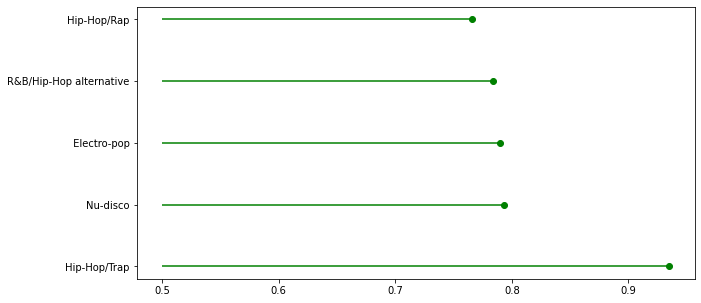

In [17]:
ft.genero_bailable(df_2020_limpio).head()

plt.figure(figsize=(10,5))
plt.hlines(y = ft.genero_bailable(df_2020_limpio).head().index, xmin = 0.5, xmax = ft.genero_bailable(df_2020_limpio).head(), color = 'green')
plt.plot(ft.genero_bailable(df_2020_limpio).head(), ft.genero_bailable(df_2020_limpio).head().index, 'o', color = 'green')


In [18]:
ft.genero_bailable(df_2019_limpio).head()

,danceability
genre,
r&b en espanol,0.88
boy band,0.84
australian pop,0.82
atl hip hop,0.80
reggaeton flow,0.80


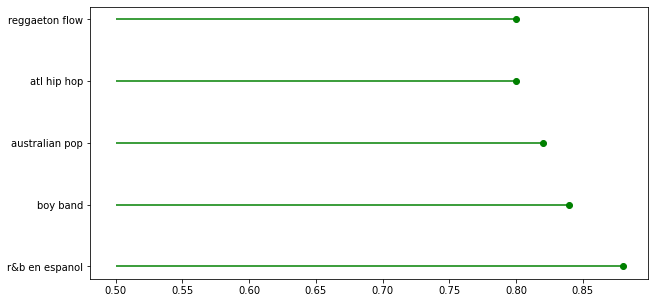

In [19]:
ft.genero_bailable(df_2019_limpio).head()

plt.figure(figsize=(10,5))
plt.hlines(y = ft.genero_bailable(df_2019_limpio).head().index, xmin = 0.5, xmax = ft.genero_bailable(df_2019_limpio).head(), color = 'g')
plt.plot(ft.genero_bailable(df_2019_limpio).head(), ft.genero_bailable(df_2019_limpio).head().index, 'o', color = 'g')

Vamos a ver entonces los artistas que han lanzado las canciones más bailables y en qué posición del ranking quedaron
<a id= 'Artistas_bailabilidad' ></a>

In [87]:
trace1 =go.Scatter(
                    x = df_2019_limpio.posicion,
                    y = df_2019_limpio.danceability,
                    mode = "markers", 
                    name = "2019",
                    marker = dict(color = 'rgba(100, 128, 255, 0.8)'),
                    text= df_2019_limpio.artist)

trace2 =go.Scatter(
                    x = df_2020_limpio.posicion,
                    y = df_2020_limpio.danceability,
                    mode = "markers",  
                    name = "2020",
                    marker = dict(color = 'rgba(255, 60, 2, 0.8)'),
                    text= df_2020_limpio.artist)

data = [trace1, trace2]

layout = dict(title = 'Bailabilidad del Top 50 de Spotify en 2019 y 2020',
              xaxis= dict(title= 'Top 50',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Danceability',ticklen= 5,zeroline= False)

             )

fig = go.Figure(data=data, layout=layout)


iplot(fig)
#fig.write_html("Bailabiladad_por_artistas.html")

Vamos a mostrar qué atributos hay que potenciar en una canción para tener éxito en las pistas de baile conforme al total de canciones estudiadas <a id= 'correlacion' ></a>

In [21]:
correlaciones = df_unido.corr()
correlaciones

,posicion,energy,danceability,loudness,speechiness,valence,tempo,length,date
posicion,1.000000e+00,0.064631,-0.030279,0.028697,-0.076801,0.052925,-0.105098,0.108370,2.085339e-13
energy,6.463094e-02,1.000000,0.087880,0.738922,-0.002283,0.410119,0.058208,0.155088,-1.058903e-01
danceability,-3.027912e-02,0.087880,1.000000,0.093138,0.068890,0.327439,0.027544,-0.016275,1.207101e-02
loudness,2.869711e-02,0.738922,0.093138,1.000000,-0.126532,0.319761,0.047690,0.150899,-1.387876e-01
speechiness,-7.680112e-02,-0.002283,0.068890,-0.126532,1.000000,0.000623,0.396029,0.198399,-2.837993e-03
valence,5.292466e-02,0.410119,0.327439,0.319761,0.000623,1.000000,0.014065,-0.028098,2.229672e-02
tempo,-1.050977e-01,0.058208,0.027544,0.047690,0.396029,0.014065,1.000000,-0.026567,-6.782717e-03
length,1.083700e-01,0.155088,-0.016275,0.150899,0.198399,-0.028098,-0.026567,1.000000,-1.383974e-02
date,2.085339e-13,-0.105890,0.012071,-0.138788,-0.002838,0.022297,-0.006783,-0.013840,1.000000e+00


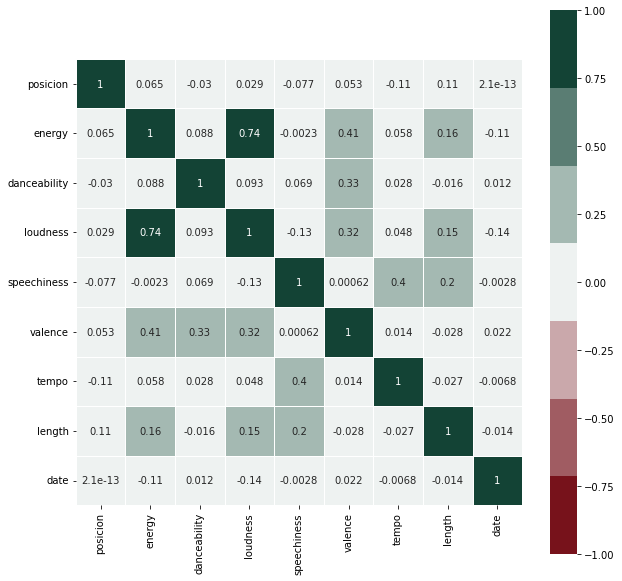

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(correlaciones,
            vmin=-1,
            vmax=1,
            annot=True,
            cmap=sns.diverging_palette(10, 880, s=85, l=25, n=7),
            square=True,
            linewidths=.5);

Como variables que tienen una buena correlación solamente cabe destacar el loudness y energy

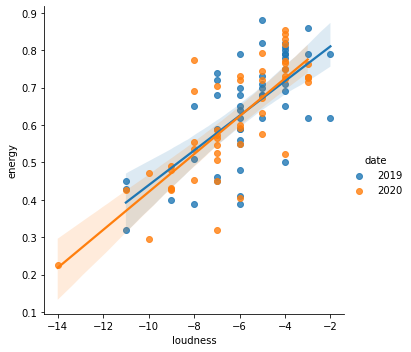

In [23]:
grafica = sns.lmplot(x = 'loudness',
           y = 'energy',
           data = df_unido,
           fit_reg = True,
           hue = 'date');

Estudio de la duración de las canciones de los dos años <a id= 'duracion' ></a>

In [76]:
print("El éxito con el tiempo de duración máxima en los dos años es:", df_unido["length"].max())
print(df_unido["length"].idxmax()) 


print("El éxito con el tiempo de duración mínima en los dos años es:", df_unido["length"].min())
print(df_unido["length"].idxmin())

print("Las canciones tienen de media una duración de:", df_unido["length"].mean().round(2))

El éxito con el tiempo de duración máxima en los dos años es: 312.82
49
El éxito con el tiempo de duración mínima en los dos años es: 115.0
71
Las canciones tienen de media una duración de: 200.46


In [78]:
print(df_unido["name"][49])
print(df_unido["artist"][49])
print(df_unido["name"][71])
print(df_unido["artist"][71])

SICKO MODE
Travis Scott
Panini
Lil Nas X


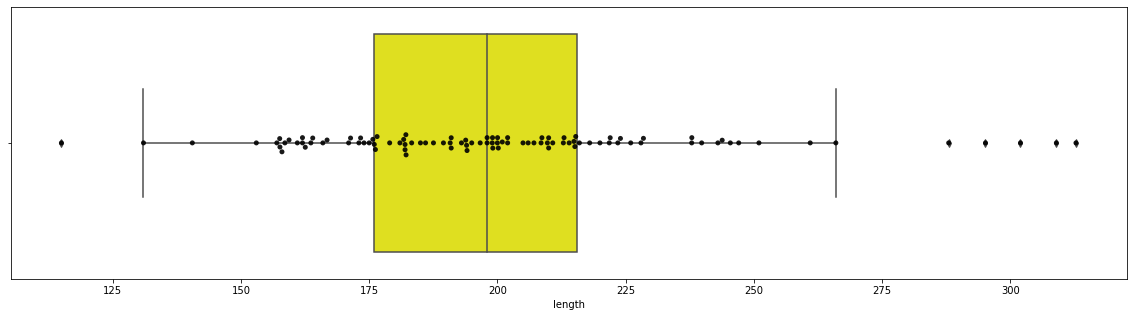

In [79]:
plt.figure(figsize=(20,5))
sns.boxplot(df_unido["length"], color = 'yellow');

sns.swarmplot(data = df_unido,
              x = 'length',
              color = 'black',
             alpha = 0.9);

El top5 de los artistas por su valence y speechiness <a id= 'mensaje' ></a>

In [ ]:
mensaje2019 = df_2019_limpio[0:5][['artist','valence', 'genre', 'speechiness', 'posicion']]
mensaje2020 = df_2020_limpio[0:5][['artist','valence', 'genre', 'speechiness', 'posicion']]
mensaje = pd.concat([mensaje2019, mensaje2020])
mensaje

,artist,valence,genre,speechiness,posicion
0,Shawn Mendes,0.750,canadian pop,0.0300,1
1,Anuel AA,0.610,reggaeton flow,0.0900,2
2,Ariana Grande,0.700,dance pop,0.4600,3
3,Ed Sheeran,0.550,pop,0.1900,4
4,Post Malone,0.180,dfw rap,0.0700,5
0,The Weeknd,0.334,R&B/Soul,0.0598,1
1,Tones And I,0.540,Alternative/Indie,0.0988,2
2,Roddy Ricch,0.642,Hip-Hop/Rap,0.0559,3
3,SAINt JHN,0.894,Dance/Electronic,0.0506,4
4,Dua Lipa,0.679,Nu-disco,0.0830,5


In [ ]:


data = [
    {
        'y': mensaje['artist'],
        'x': mensaje['genre'],
        'mode': 'markers',
        'marker': {
            'color': mensaje['valence'],
            'size': mensaje['speechiness']*250,
            'showscale': True
        },
        'text': mensaje['posicion']
    }
]

iplot(data)


Los géneros más escuchados <a id= 'Top_generos' ></a>

In [ ]:
top_generos_2020 = df_2020_limpio['genre'].value_counts()
top_generos_2020 

Pop                                   14
Hip-Hop/Rap                           13
Dance/Electronic                       5
Alternative/Indie                      4
R&B/Soul                               2
 Electro-pop                           2
Nu-disco                               1
R&B/Hip-Hop alternative                1
Pop/Soft Rock                          1
Pop rap                                1
Hip-Hop/Trap                           1
Dance-pop/Disco                        1
Disco-pop                              1
Dreampop/Hip-Hop/R&B                   1
Alternative/reggaeton/experimental     1
Chamber pop                            1
Name: genre, dtype: int64

In [ ]:
#La idea es hacer un DataFrame para agrupar los géneros con menor presencia en una solo categoría

top_generos_2020 = pd.DataFrame(data=top_generos_2020, columns=['genre'])

Nueva_df =top_generos_2020.reset_index()

Nueva_df

,index,genre
0,Pop,14
1,Hip-Hop/Rap,13
2,Dance/Electronic,5
3,Alternative/Indie,4
4,R&B/Soul,2
5,Electro-pop,2
6,Nu-disco,1
7,R&B/Hip-Hop alternative,1
8,Pop/Soft Rock,1
9,Pop rap,1


In [ ]:
#El top 6
df1 = Nueva_df.iloc[0:6].copy()

#others
new_row = pd.DataFrame(data = {
    'index' : ['others'],
    'genre' : [Nueva_df['genre'][7:].sum()]
})

#Combinnamos el top 6 con others
df2 = pd.concat([df1, new_row])
df2

,index,genre
0,Pop,14
1,Hip-Hop/Rap,13
2,Dance/Electronic,5
3,Alternative/Indie,4
4,R&B/Soul,2
5,Electro-pop,2
0,others,9


In [ ]:
#Igual para el 2019
top_generos_2019 = df_2019_limpio['genre'].value_counts()
top_generos_2019

dance pop           8
pop                 7
latin               5
canadian hip hop    3
edm                 3
reggaeton           2
reggaeton flow      2
panamanian pop      2
canadian pop        2
electropop          2
country rap         2
dfw rap             2
brostep             2
trap music          1
escape room         1
pop house           1
australian pop      1
atl hip hop         1
big room            1
boy band            1
r&b en espanol      1
Name: genre, dtype: int64

In [ ]:
top_generos_2019 = pd.DataFrame(data=top_generos_2019, columns=['genre'])
Nueva_df19 =top_generos_2019.reset_index()
Nueva_df19

,index,genre
0,dance pop,8
1,pop,7
2,latin,5
3,canadian hip hop,3
4,edm,3
5,reggaeton,2
6,reggaeton flow,2
7,panamanian pop,2
8,canadian pop,2
9,electropop,2


In [ ]:
#the top 13
df1_19 = Nueva_df19.iloc[0:13].copy()

#others
new_row_19 = pd.DataFrame(data = {
    'index' : ['others'],
    'genre' : [Nueva_df19['genre'][13:].sum()]
})

#combinamos el top 13 con others
df2_19 = pd.concat([df1_19, new_row_19])
df2_19

,index,genre
0,dance pop,8
1,pop,7
2,latin,5
3,canadian hip hop,3
4,edm,3
5,reggaeton,2
6,reggaeton flow,2
7,panamanian pop,2
8,canadian pop,2
9,electropop,2


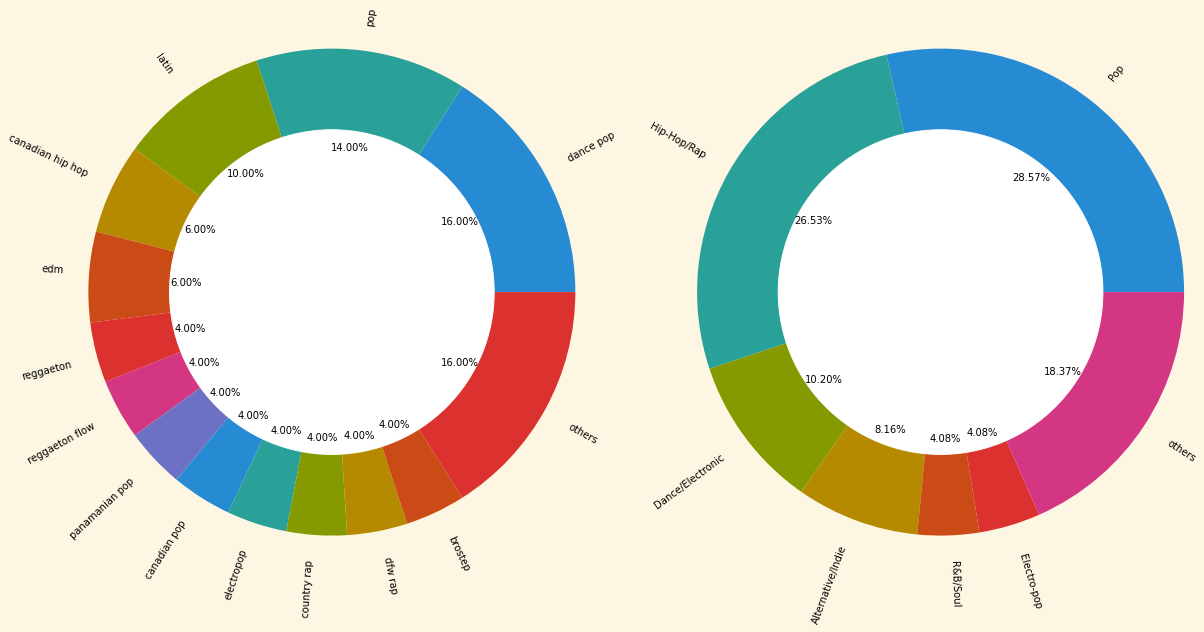

In [ ]:
plt.style.use('Solarize_Light2')
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
my_circle=plt.Circle( (0,0), 0.8, color='white')

plt.pie(df2_19.genre,
        labels = df2_19['index'],
        autopct='%1.2f%%',
        rotatelabels=True,
        radius=1.2
        )
p = plt.gcf() 
p.gca().add_artist(my_circle) ;

plt.subplot(1,2,2)
my_circle=plt.Circle( (0,0), 0.8, color='white')
plt.pie(df2.genre,
        labels = df2['index'],
        autopct='%1.2f%%',
        rotatelabels=True,
        radius=1.2
        )
p = plt.gcf() 
p.gca().add_artist(my_circle) ;

Los distintos géneros en que diversifican los artistas que han accedido al ranking. <a id= 'diversificacion' ></a>

In [90]:
Diversificacion = df_unido[['genre',"artist"]].groupby(["artist", "genre"]).mean()
#Diversificacion
Diversificacion[10:14]

Empty DataFrame
Columns: []
Index: [(Billie Eilish,  Electro-pop), (Billie Eilish, Chamber pop), (Billie Eilish, Pop), (Billie Eilish, electropop)]

Los artistas con más presencia en los dos últimos años <a id= 'nube' ></a>

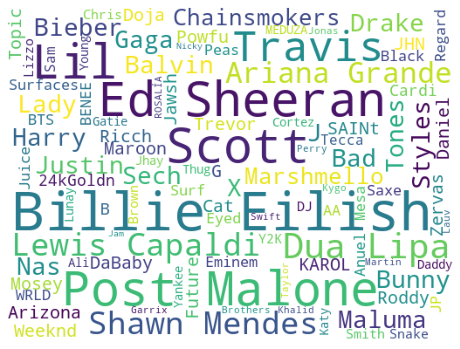

In [ ]:
Presencia = df_unido.artist
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(Presencia))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()